# Data Overview

<a href='https://www.kaggle.com/datasets/miguelh65/tomato-plant-disease-dataset'>tomato-plant-disease-dataset link</a>

<p>Leaf_Spot_Size - Size of leaf spots in cm².<br>
Data Type: Numeric (float)<br>
Value Range: 0 to 10 cm²</p>

<p>Leaf_Color_Index - Leaf color index, ranging from 0 (healthy) to 100 (highly diseased).<br>
Data Type: Numeric (float)<br>
Value Range: 0 to 100</p>

<p>Temperature - Ambient temperature in degrees Celsius.<br>
Data Type: Numeric (float)<br>
Value Range: 15°C to 35°C</p>

<p>Humidity - Relative humidity in percentage.<br>
Data Type: Numeric (float)<br>
Value Range: 30% to 90%</p>

<p>Disease - Disease of the plant (Healthy or Diseased).<br>
Data Type: Categorical<br>
Categories: 'Healthy', 'Diseased'</p>

# Objectif de la prediction

classification: predire si une plante de tomate est malade en fonction de différents parametre (taille et couleur de la feuille, temperature et humidité)

projet metier: permet de savoir si une plante tombe plus souvent malade suivant un climat en particulier (temperature et humidité)

# Sommaire

1. Setup librairies
2. collect de donnée brut
3. netoyage et preparation des données
4. objectif de la prediction
5. selection de l’algo et du model
6. entrainement du modele
7. deploiement du modele
8. evaluation et enjeux


# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and explore dataset

In [2]:
# Load the dataset
file_path = './datasets/tomato_disease.csv'
df = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (500, 6)


,Unnamed: 0,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity,Disease
0,0,5.496714,54.630888,24.798711,63.891805,Diseased
1,1,4.861736,59.547083,23.849267,57.244071,Diseased
2,2,5.647689,43.007162,22.119261,55.909006,Healthy
3,3,6.523030,52.814846,20.706126,59.983128,Diseased
4,4,4.765847,46.746787,23.396447,59.149077,Diseased



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        500 non-null    int64  
 1   Leaf_Spot_Size    500 non-null    float64
 2   Leaf_Color_Index  500 non-null    float64
 3   Temperature       500 non-null    float64
 4   Humidity          500 non-null    float64
 5   Disease           500 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 23.6+ KB
None

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500.0,249.500000,144.481833,0.000000,124.750000,249.500000,374.250000,499.000000
Leaf_Spot_Size,500.0,5.006838,0.981253,1.758733,4.299693,5.012797,5.636783,8.852731
Leaf_Color_Index,500.0,50.159131,4.889986,36.515567,47.023541,50.142658,53.256211,63.161910
Temperature,500.0,22.216969,2.020493,16.207489,20.795141,22.239612,23.509477,27.203366
Humidity,500.0,60.165940,4.920331,45.298057,56.940319,59.955433,63.498847,75.965538


In [4]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


# Unique Value Exploration

In [5]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
Unnamed: 0          500
Leaf_Spot_Size      500
Leaf_Color_Index    500
Temperature         500
Humidity            500
Disease               2
dtype: int64


In [6]:
# supprimer la premiere colonne de count
df = df.drop(df.columns[0], axis=1)

df.head()
len(df.columns)

5

In [7]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['Leaf_Spot_Size', 'Leaf_Color_Index', 'Temperature', 'Humidity']
Categorical Columns: ['Disease']


# Exploratory Data Analysis

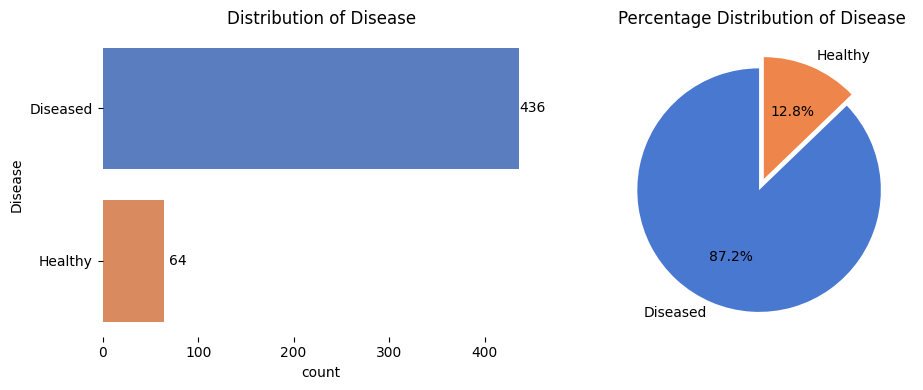

In [8]:
column_name = 'Disease'
plt.figure(figsize=(10, 4))

# First subplot: Count plot
plt.subplot(1, 2, 1)
sns.countplot(y=column_name, data=df, palette='muted', hue=column_name, legend=False)  
plt.title(f'Distribution of {column_name}')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Second subplot: Pie chart
plt.subplot(1, 2, 2)
df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
plt.title(f'Percentage Distribution of {column_name}')
plt.ylabel('')  

plt.tight_layout()
plt.show()

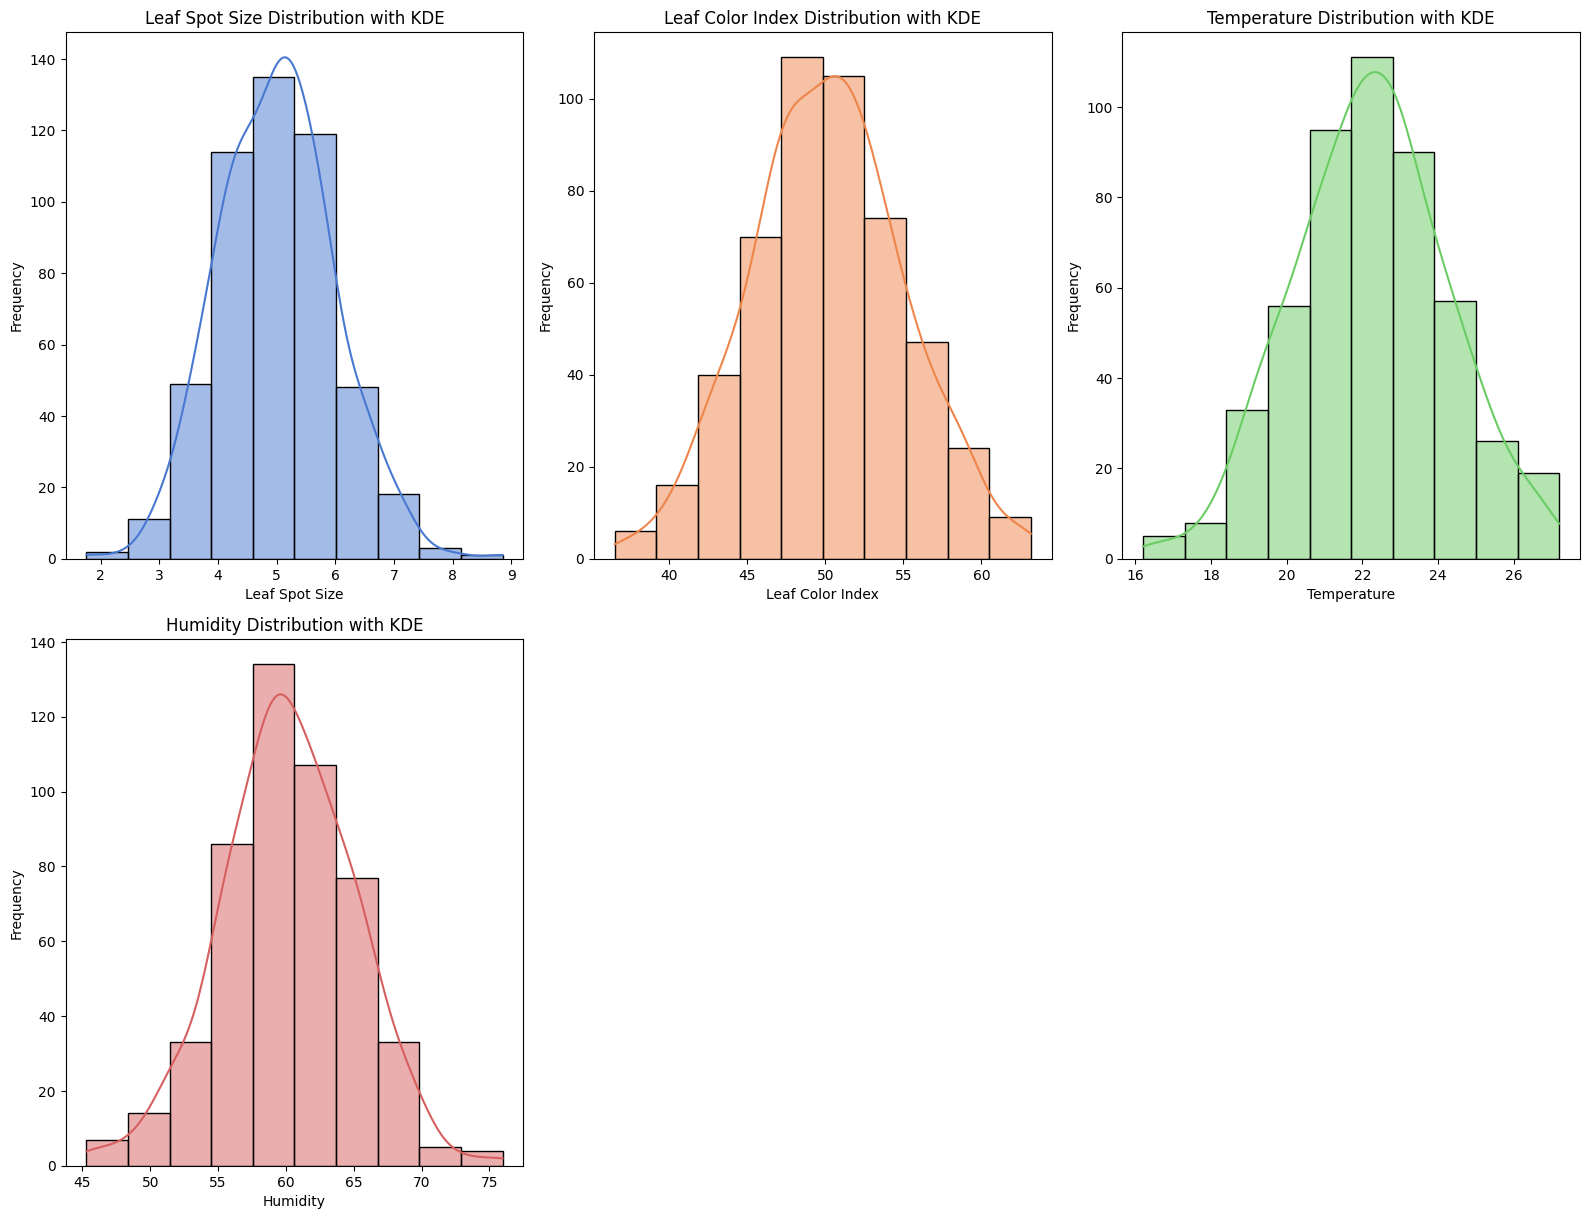

In [9]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(16, 24))  # Adjusted to accommodate more plots
    
    muted_colors = sns.color_palette("muted", len(columns))
    
    for i, column in enumerate(columns):
        plt.subplot(4, 3, i + 1)  
        sns.histplot(data[column], kde=True, bins=10, color=muted_colors[i])
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
columns_to_analyze = numerical_columns

# Perform univariate analysis
univariate_analysis(df, columns_to_analyze)

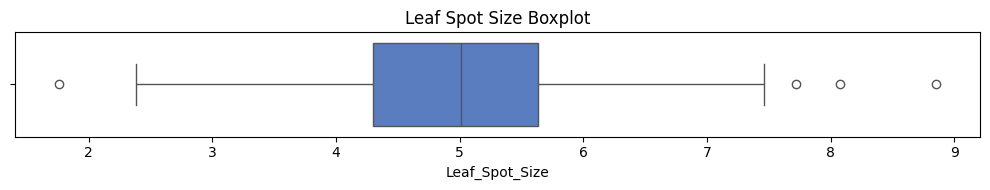


Summary Statistics for Leaf Spot Size:
 count    500.000000
mean       5.006838
std        0.981253
min        1.758733
25%        4.299693
50%        5.012797
75%        5.636783
max        8.852731
Name: Leaf_Spot_Size, dtype: float64


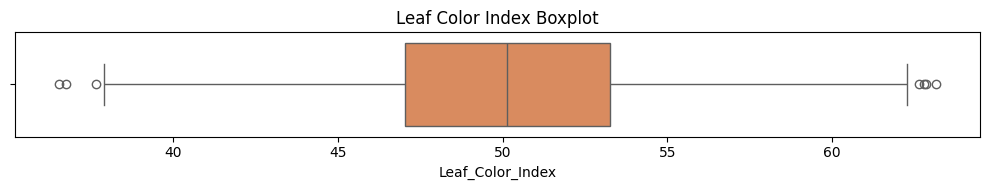


Summary Statistics for Leaf Color Index:
 count    500.000000
mean      50.159131
std        4.889986
min       36.515567
25%       47.023541
50%       50.142658
75%       53.256211
max       63.161910
Name: Leaf_Color_Index, dtype: float64


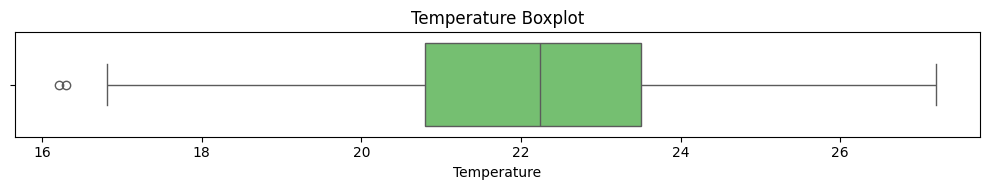


Summary Statistics for Temperature:
 count    500.000000
mean      22.216969
std        2.020493
min       16.207489
25%       20.795141
50%       22.239612
75%       23.509477
max       27.203366
Name: Temperature, dtype: float64


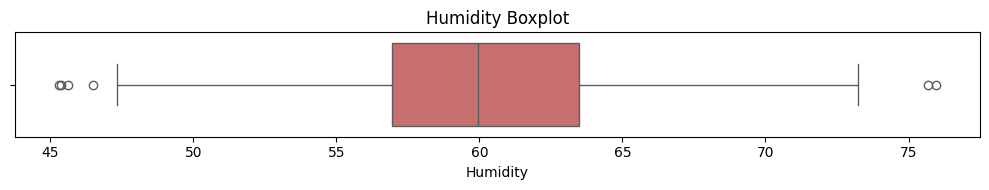


Summary Statistics for Humidity:
 count    500.000000
mean      60.165940
std        4.920331
min       45.298057
25%       56.940319
50%       59.955433
75%       63.498847
max       75.965538
Name: Humidity, dtype: float64


In [10]:
# Function to perform univariate analysis for numeric columns with boxplots and statistics
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    color = sns.color_palette("muted")[columns_to_analyze.index(column) % len(sns.color_palette("muted"))]
    
    sns.boxplot(x=data[column], color=color)
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = numerical_columns

# Iterate through columns and perform univariate analysis
for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

In [11]:
df.columns

Index(['Leaf_Spot_Size', 'Leaf_Color_Index', 'Temperature', 'Humidity',
       'Disease'],
      dtype='object')

### **Summary of Categorization with Descriptions:**

| **Category**               | **Features**                                                                 | **Description**                                                                                     |
|-----------------------------|------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| **Environmental Conditions** | `Temperature`, `Humidity`                       | Surrounding environmental factors that influence plant growth and stress levels.                    |
| **Plant Health Indicators**  | `Leaf_Spot_Size`, `Leaf_Color_Index`                            | Direct indicators of plant health |


In [12]:
def Subplot_Relationship_VS_Disease(properties):
    plt.figure(figsize=(16, 20))
    for i, feature in enumerate(properties):
        plt.subplot(3, 2, i + 1)
        sns.boxplot(x='Disease', y=feature, data=df, palette='muted', hue='Disease', legend=False)
        plt.title(f'{feature} vs Disease')
        plt.xlabel('Disease')
        plt.ylabel(feature.replace('_', ' '))
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

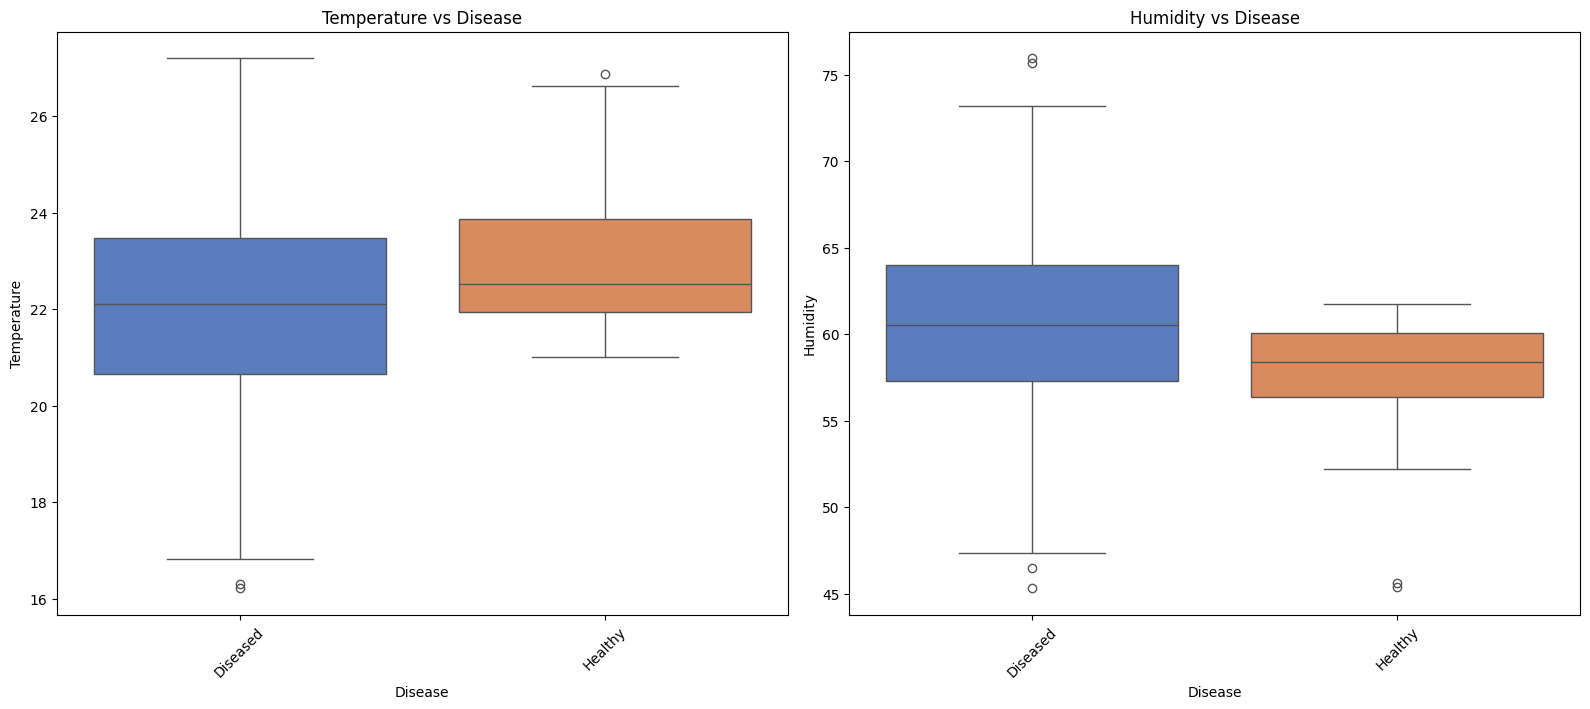

In [13]:
# Compare Disease with Environmental Conditions
# Define environmental condition features
environmental_conditions = [
    'Temperature', 'Humidity'
]

# Create subplots to visualize the relationship between Disease and environmental conditions
Subplot_Relationship_VS_Disease(environmental_conditions)

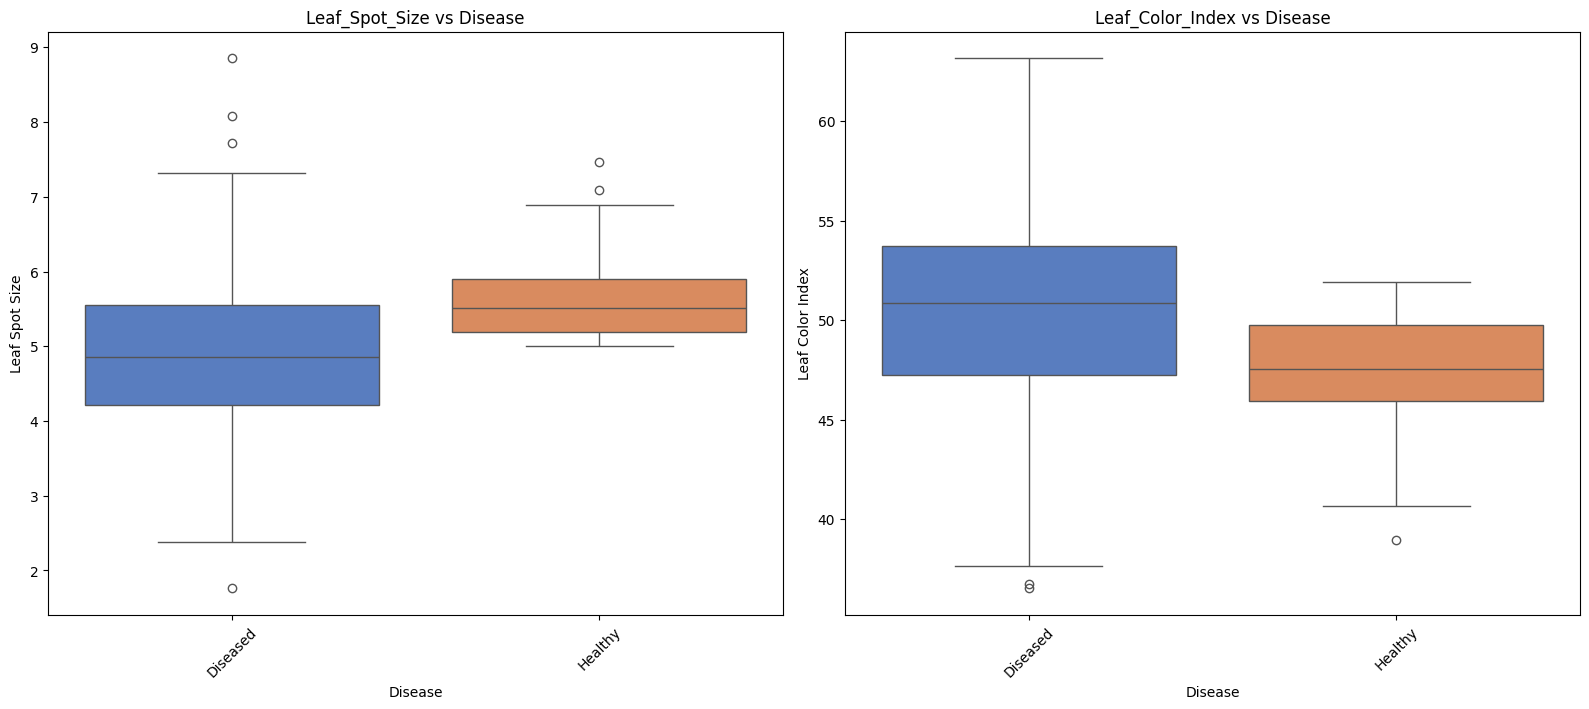

In [14]:
# Compare Disease with Plant Health Indicators

# Define plant health indicator features
health_indicators = [
    'Leaf_Spot_Size', 'Leaf_Color_Index'
]

# Create subplots to visualize the relationship between Disease and plant health indicators
Subplot_Relationship_VS_Disease(health_indicators)

In [15]:
# Explore relationships between Disease and Soil Properties

soil_mean = df.groupby('Disease')[environmental_conditions].mean()
soil_std = df.groupby('Disease')[environmental_conditions].std()

# Displaying the mean values table
print("----- Mean Soil Properties by Disease -----")
display(soil_mean)

# Displaying the standard deviation table
print("\n----- Standard Deviation of Soil Properties by Disease -----")
display(soil_std)

----- Mean Soil Properties by Disease -----


,Temperature,Humidity
Disease,,
Diseased,22.097913,60.530740
Healthy,23.028039,57.680735



----- Standard Deviation of Soil Properties by Disease -----


,Temperature,Humidity
Disease,,
Diseased,2.059536,5.010055
Healthy,1.510265,3.353590


In [16]:
# Explore relationships between Disease and Soil Properties

soil_mean = df.groupby('Disease')[health_indicators].mean()
soil_std = df.groupby('Disease')[health_indicators].std()

# Displaying the mean values table
print("----- Mean Soil Properties by Disease -----")
display(soil_mean)

# Displaying the standard deviation table
print("\n----- Standard Deviation of Soil Properties by Disease -----")
display(soil_std)

----- Mean Soil Properties by Disease -----


,Leaf_Spot_Size,Leaf_Color_Index
Disease,,
Diseased,4.912120,50.577871
Healthy,5.652107,47.306458



----- Standard Deviation of Soil Properties by Disease -----


,Leaf_Spot_Size,Leaf_Color_Index
Disease,,
Diseased,0.993637,4.986884
Healthy,0.569385,2.864079


In [17]:
def FacetGridplot_Relationship_VS_Disease(properties):
    for condition in properties:
        g = sns.FacetGrid(
            df, 
            col='Disease', 
            height=4, 
            aspect=1.2, 
            sharex=True, 
            sharey=True, 
        )
        g.map(sns.histplot, condition, kde=True, bins=10, color=None)
        g.set_axis_labels(condition.replace('_', ' '), 'Frequency')
        g.set_titles("{col_name} - Disease")
        g.fig.subplots_adjust(top=0.85)  
        g.fig.suptitle(
            f'Distribution of {condition.replace("_", " ")} by Disease', 
            fontsize=16, 
            y=0.98  
        )
        plt.show()

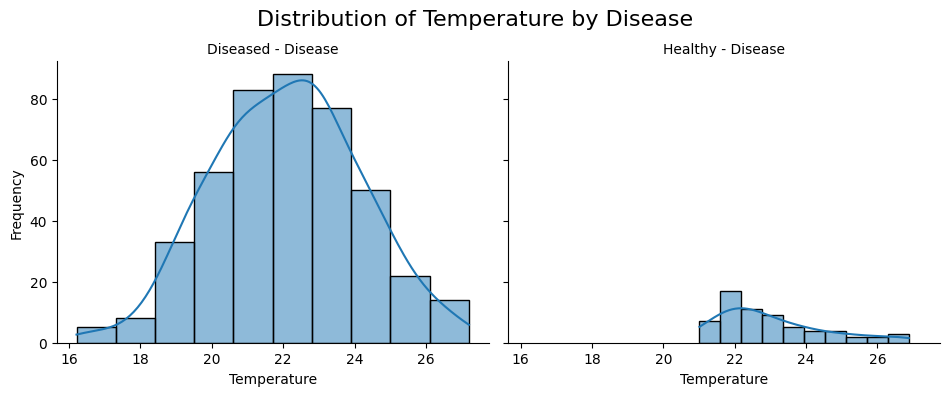

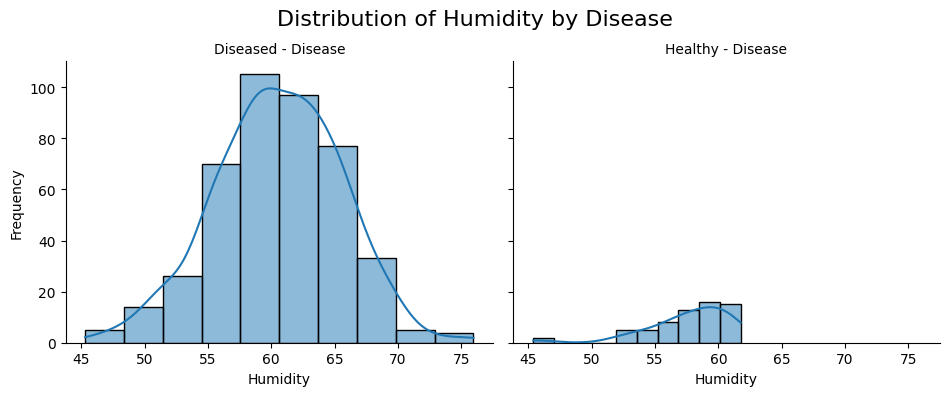

In [18]:
# Environmental Conditions vs Disease using FacetGrid with improved styling

# Create FacetGrid plots for each environmental condition with improved styling
FacetGridplot_Relationship_VS_Disease(environmental_conditions)


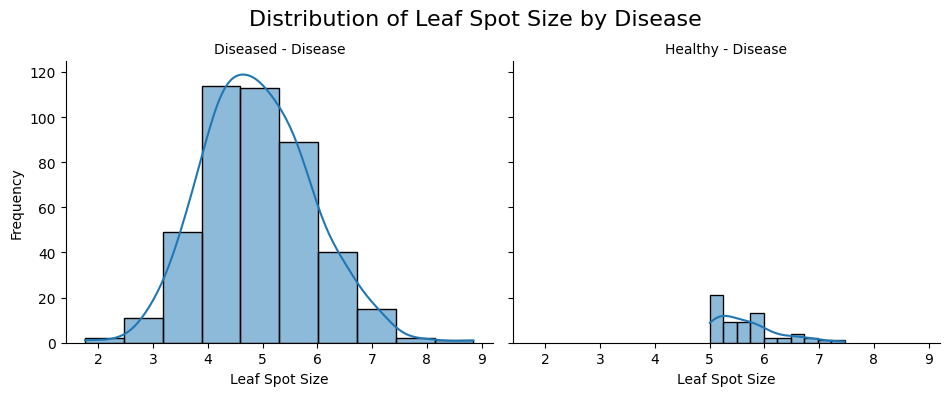

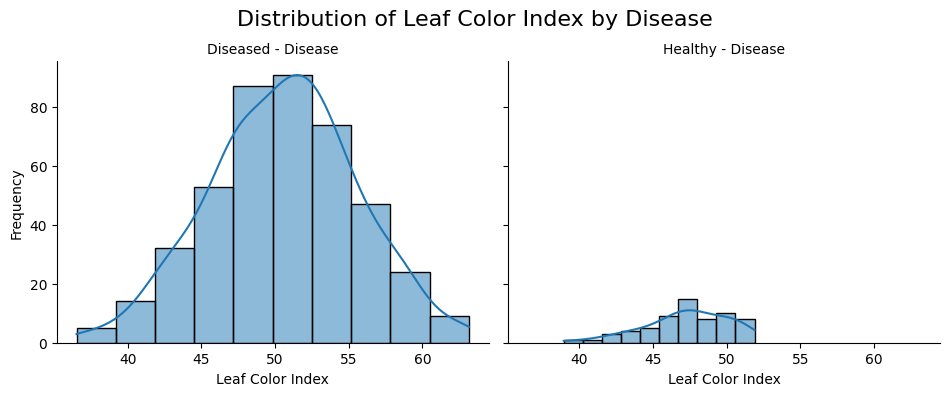

In [19]:
# Create FacetGrid plots for each health indicator
FacetGridplot_Relationship_VS_Disease(health_indicators)

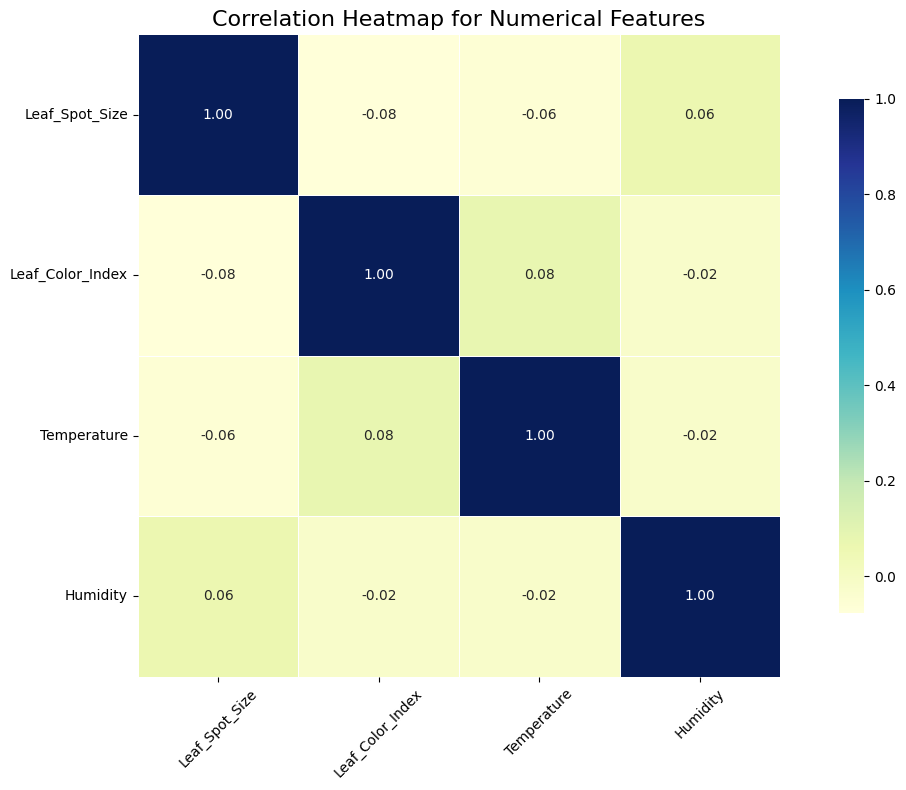

In [20]:
numerical_features = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='YlGnBu', 
    square=True, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap for Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Detailed Insights from Correlation Table

1. Strongest Positive Correlations:
   * Temperature and Leaf_Color_Index (~0.08)
   * Humidity and Leaf_Spot_Size (~0.06)
2. Strongest Negative Correlations:
   * Leaf_Color_Index and Leaf_Spot_Size (~-0.08)
   * Temperature and Leaf_Spot_Size (~-0.06)
3. Relationship between Environment properties:
   * Temperature and Humidity (~-0.02)

# Data preprocessing

## Transformation de données

### Imputation

In [21]:
# Vérifier si n'importe quelle colonne contient des valeurs manquantes
df.isnull().any()

Leaf_Spot_Size      False
Leaf_Color_Index    False
Temperature         False
Humidity            False
Disease             False
dtype: bool

Pas de cellules vide donc pas d'imputeur à utiliser

### Encoder

In [22]:
# Label Encoding
# df['Disease'] = df['Disease'].map({'Diseased': 0, 'Healthy': 1})

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Disease'] = le.fit_transform(df['Disease'])

df.head()

,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity,Disease
0,5.496714,54.630888,24.798711,63.891805,0
1,4.861736,59.547083,23.849267,57.244071,0
2,5.647689,43.007162,22.119261,55.909006,1
3,6.523030,52.814846,20.706126,59.983128,0
4,4.765847,46.746787,23.396447,59.149077,0


* pas besoin de discretiser des variables continue (regrouper par categorie des "range" de variable continue)
* pas besoin de créer des variable dérivées

### Correlations

In [23]:
# Calculate correlations
correlations = df.corr()['Disease'].sort_values(ascending=False)

# Convert to DataFrame
correlation_table = correlations.to_frame(name='Correlation with Disease').reset_index()
correlation_table.rename(columns={'index': 'Feature'}, inplace=True)

# Display the table
display(correlation_table)

,Feature,Correlation with Disease
0,Disease,1.000000
1,Leaf_Spot_Size,0.252198
2,Temperature,0.153951
3,Humidity,-0.193709
4,Leaf_Color_Index,-0.223731


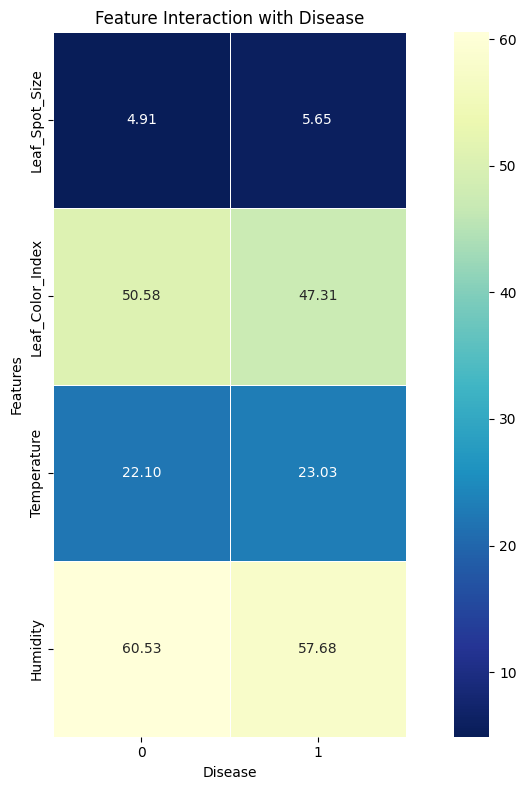

In [24]:
# Ensure 'Disease' is included and calculate mean values
status_correlation = df.groupby('Disease').mean().T

plt.figure(figsize=(10, 8))
sns.heatmap(status_correlation, annot=True, cmap='YlGnBu_r', fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": 1})
plt.title('Feature Interaction with Disease')
plt.ylabel('Features')
plt.xlabel('Disease')
plt.tight_layout()
plt.show()

## Preparation des données

### Séparation features et label

Enlever la colonne Disease pour séparer "features" et "label" dans le train pour entrainer le model et on le met dans le test pour tester le model

In [25]:
y = df['Disease']
X = df.drop(['Disease'], axis=1)

### train test split

In [26]:
from sklearn.model_selection import train_test_split

# je divise les données entre donnée d'entrainement et de test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

# Display the shapes of the splits for verification
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (250, 4)
X_test Shape: (250, 4)
y_train Shape: (250,)
y_test Shape: (250,)


### Normalisation

In [27]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Selection de l'algorithme et du model

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "KNN Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Display model names to confirm initialization
print("Models initialized:", list(models.keys()))

Models initialized: ['Logistic Regression', 'KNN Classifier', 'Decision Tree', 'Random Forest', 'Gradient Boosting']



Model: Logistic Regression
Accuracy: 0.75
ROC AUC Score: 0.86

Log loss: 8.938826040501056


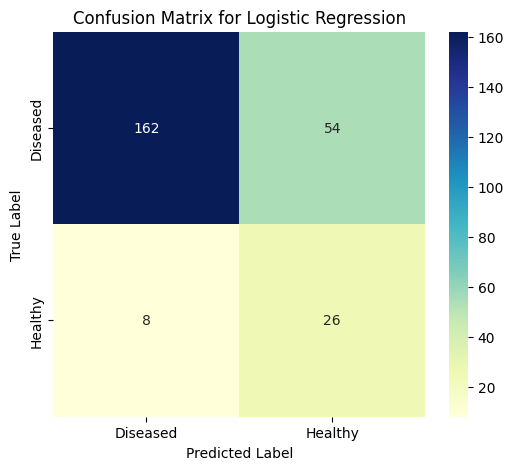

              precision    recall  f1-score   support

    Diseased       0.95      0.75      0.84       216
     Healthy       0.33      0.76      0.46        34

    accuracy                           0.75       250
   macro avg       0.64      0.76      0.65       250
weighted avg       0.87      0.75      0.79       250


Model: KNN Classifier
Accuracy: 0.96
ROC AUC Score: 0.97

Log loss: 1.4417461355646863


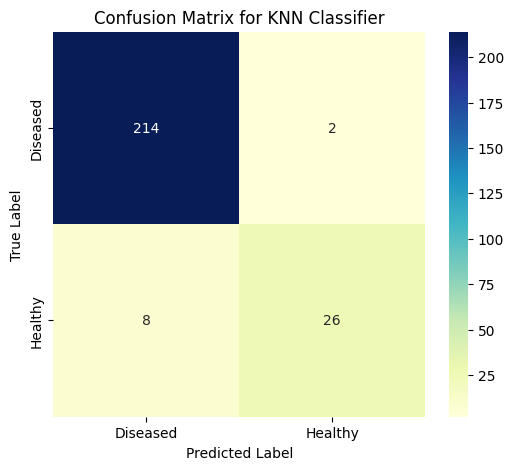

              precision    recall  f1-score   support

    Diseased       0.96      0.99      0.98       216
     Healthy       0.93      0.76      0.84        34

    accuracy                           0.96       250
   macro avg       0.95      0.88      0.91       250
weighted avg       0.96      0.96      0.96       250


Model: Decision Tree
Accuracy: 0.98
ROC AUC Score: 0.96

Log loss: 0.7208730677823433


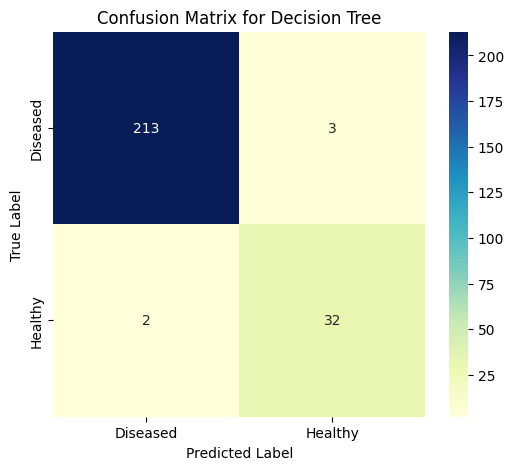

              precision    recall  f1-score   support

    Diseased       0.99      0.99      0.99       216
     Healthy       0.91      0.94      0.93        34

    accuracy                           0.98       250
   macro avg       0.95      0.96      0.96       250
weighted avg       0.98      0.98      0.98       250


Model: Random Forest
Accuracy: 0.98
ROC AUC Score: 1.00

Log loss: 0.7208730677823433


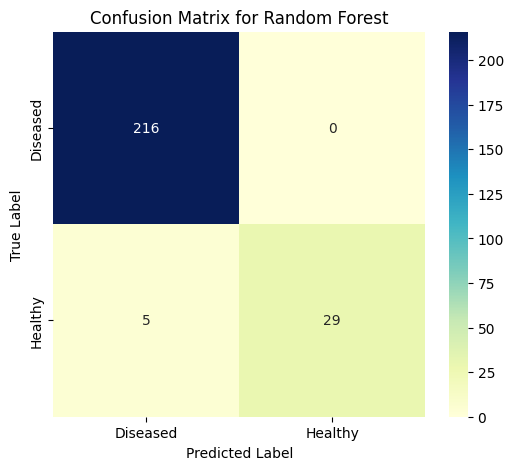

              precision    recall  f1-score   support

    Diseased       0.98      1.00      0.99       216
     Healthy       1.00      0.85      0.92        34

    accuracy                           0.98       250
   macro avg       0.99      0.93      0.95       250
weighted avg       0.98      0.98      0.98       250


Model: Gradient Boosting
Accuracy: 1.00
ROC AUC Score: 1.00

Log loss: 2.220446049250313e-16


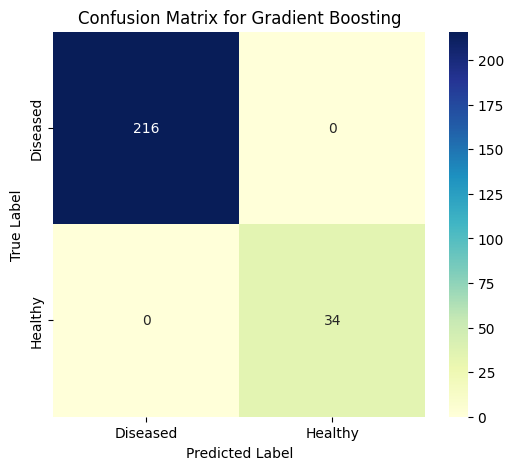

              precision    recall  f1-score   support

    Diseased       1.00      1.00      1.00       216
     Healthy       1.00      1.00      1.00        34

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Initialize lists to store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate AUC
    if hasattr(model, "predict_proba"):  
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None
    
    from sklearn.metrics import log_loss

    log_loss_value = log_loss(y_test, y_pred)

    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "AUC": auc,
        "LOSS": log_loss_value,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, target_names=['Diseased', 'Healthy'])
    })

# Display results for each model
for result in results:
    print(f"\nModel: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    if result["AUC"] is not None:
        print(f"ROC AUC Score: {result['AUC']:.2f}")
    print(f"\nLog loss: {result['LOSS']}")
    # Confusion Matrix Visualization
    cm = result["Confusion Matrix"]
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Diseased', 'Healthy'], 
                yticklabels=['Diseased', 'Healthy'])
    plt.title(f'Confusion Matrix for {result["Model"]}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Calcul et tracé de la courbe ROC
    # fpr, tpr, _ = roc_curve(y_test, y_prob)
    # plt.plot(fpr, tpr)
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('ROC Curve')
    # plt.show()
    
    # Print Classification Report
    print(result["Classification Report"])

In [46]:
# Prepare a summary table for model evaluation
evaluation_summary = []

# Extract the key metrics for each model
for result in results:
    evaluation_summary.append({
        "Model": result["Model"],
        "Accuracy": result["Accuracy"],
        "AUC": result["AUC"]
    })

evaluation_summary_df = pd.DataFrame(evaluation_summary)

# Sort by accuracy and display
display(evaluation_summary_df.sort_values(by="Accuracy", ascending=False))

,Model,Accuracy,AUC
4,Gradient Boosting,1.000,1.000000
3,Random Forest,0.980,1.000000
2,Decision Tree,0.980,0.963644
1,KNN Classifier,0.960,0.969635
0,Logistic Regression,0.752,0.862200


In [48]:
# Select the Model with the Highest AUC
# best_model_name = max(results, key=lambda x: x["AUC"] if x["AUC"] is not None else -1)["Model"]
best_model_name = "Gradient Boosting"
best_model = models[best_model_name]
print(f"The best model based on AUC is: {best_model_name}")

The best model based on AUC is: Gradient Boosting


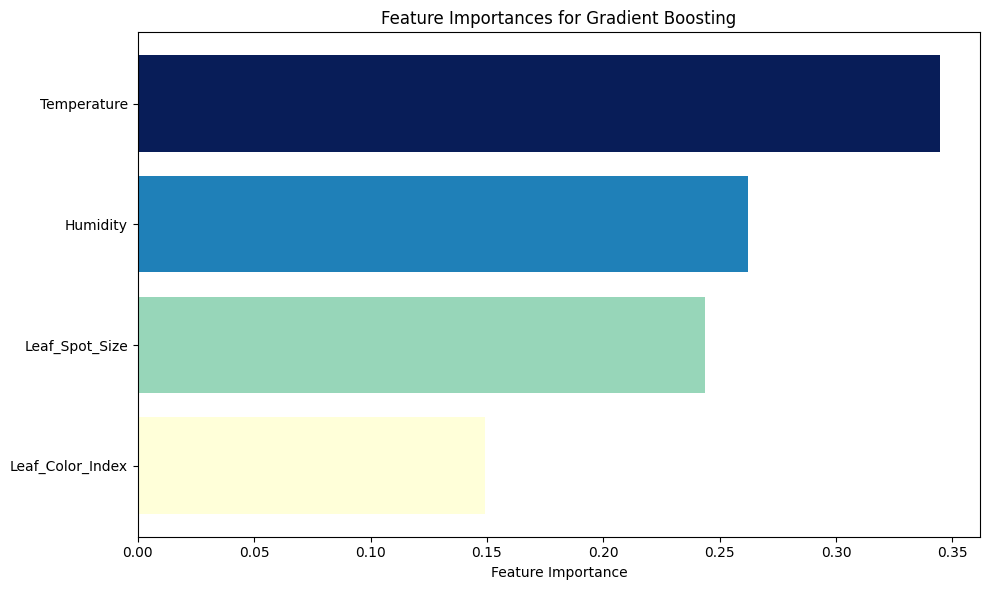

In [49]:
# Plot the Feature Importances
if hasattr(best_model, "feature_importances_"):  # Check if the model has feature_importances_
    feature_importances = best_model.feature_importances_
    feature_names = X.columns

    plt.figure(figsize=(10, 6))
    sorted_idx = feature_importances.argsort()[::-1]

    # Using color palette 'winter' for the bars
    colors = plt.cm.YlGnBu_r(np.linspace(0, 1, len(feature_importances)))

    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color=colors)
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importances for {best_model_name}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"{best_model_name} does not support feature importances.")

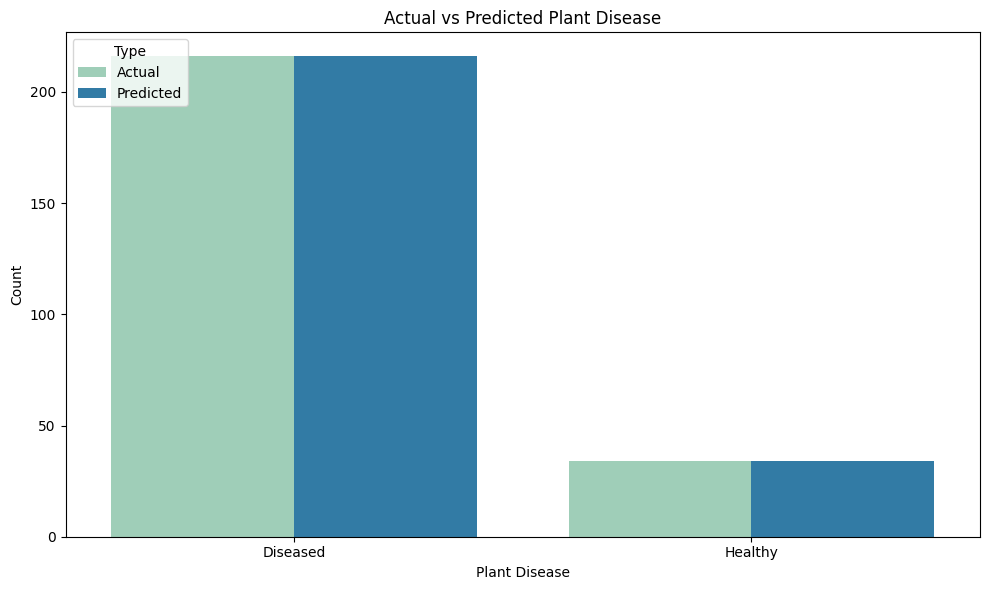

In [50]:
plt.figure(figsize=(10, 6))

# Convert the actual and predicted values to a DataFrame for comparison
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': best_model.predict(X_test_scaled)
})

sns.countplot(
    data=actual_vs_predicted.melt(var_name='Type', value_name='Disease'),
    x='Disease', hue='Type', palette='YlGnBu'
)

plt.xticks([0, 1], labels=["Diseased", "Healthy"])
plt.xlabel("Plant Disease")
plt.ylabel("Count")
plt.title("Actual vs Predicted Plant Disease")
plt.legend(title="Type", loc="upper left")
plt.tight_layout()
plt.show()

### ROC

In [51]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")


ROC AUC Score: 1.0
